<h1> 1. Modelos AR autorregresivos </h1>

Despupes de un análisis descriptivo y exploratorio de la serie temporal, el objetivo siguiente, va a ser predecir el futuro en base a un modelo de series temporales. El procedimiento general es el siguiente:
1. Escoger el modelo.
2. Dividir los datos en datos de entrenamiento y datos de prueba.
3. Ajustar el modelo  los datos de entrenamiento.
4. Evaluar el modelo en los datos de prueba.
5. Re-ajustar el modelo con todos los datos.
6. Predecir los datos futuros.

**¿Cómo seleccionar el modelo más apropiado?**

Usualmente comenzamos con un modelo simple y luego lo expandimos siempre que se cumplan varias condiciones. Obviamente podemos complejizar el modelo introduciendo más retrasos, pero este modelo más complejo tendrá más coeficientes para estimar. Cuando hagamos esto, puede ser que el modelo no sea apropiado, por eso una de las cosas que debemos **comprobar es que los nuevos coeficientes sean significativamente diferentes de cero.**

Si eso no es cierto, las estimaciones para estos parámetros son esencialmente cero. Por lo tanto, no nos ayudan a estimar valores futuros. Esto significa que no tienen poder predictivo, por lo que debemos desecharlo y volver al modelo más simple.

Una vez que tengamos varios posibles modelos, debemos compaararlos entre sí. Para determinar si las predicciones de un modelo son significativamente mejores que las de otro, utilizaremos la **inferencia.** Donde tendremos una prueba estadística llamada **prueba de razón de log-verosimilitudes o log-likelihood test**. Sin embargo, la prueba solo se puede aplicar a modelos con diferentes *grados de liberad* (número de parámetros que estima).

Por lo tanto, al comparar varios modelos con el mismo número total de parámetros estimados, vamos a usar los **Criterios de Información** de cada uno. Los dos criterios de información más usados son el $AIC$ y el $BIC$.

1. $AIC.$ Akaike Information Criteria.
2. $BIC.$ Bayesian Information Criteria.

El mejor modelo será el que tenga menor $AIC$ o $BIC$.

Además se mirará el valor de la *log-verosimilitud*  (LL: Log Likelihood) de ambos modelos en el resumen estadístico. El mejor modelo será el que tenga mayor LL.  

Por otro lado, si nuestro modelo se ajusta bien, no debería haber un efecto de tendencia que no hayamos tenido en cuenta, esto se traduce en que los residuos del modelo deben parecerse al ruido blanco, por lo que podemos concluir que no hay otro patrón por ahí escondido. Esto debe comprobarse a través de la prueba *DF* de estacionariedad, que debe dar positiva a favor de los residuos siendo estacionarios. Y a travpes de la función de autocorrelación de los residuos, en la que se debería obtener que no hay correlaciones significativas.

<h2> 1.1 Modelo Autorregresivo AR </h2>

Los modelos autorregresivos predicen el valor de nuestra serie temporal en función de los valores pasados. Un modelo autorregresivo de orden simple, de orden uno, sólo consideraría el valor del período anterior $x_{t-1}$, y el modelo se expresaría de la siguiente manera: $$x_t=c+\Phi _1x_{t-1}+\varepsilon _t$$
Donde: 
* $x_t$ es el valor de interés, del período actual, de nuestra serie de tiempo.
* $c$ es la constante.
* $\Phi _1$ es el coeficiente que debemos estimar.
* $\varepsilon _t$ es el residuo en el período actual.
* $x_{t-1}$ es el valor de laa serie en el período anterios.

Además, $|\Phi _1|<1$, es decir, $-1<\Phi _1<1$


De manera general, tendremos lo siguiente: $$x_t=c+\Phi _1x_{t-1}+\Phi _2x_{t-2}+\cdots +\Phi _p x_{t-p}  +\varepsilon _t$$


**OJO:** NO funcionan bien si los datos NO son estacionarios, es decir, **los datos tiene que ser estacionarios.** 


<h3>  ¿Cómo saber si debemos incluir más retraso y cuantos </h3>

Sabemos que la $ACF$ captura los efectos directos e indirectos del valor anterior sobre el valor presente. Como queremos un modelo eficiente solo queremos considerar aquellos retraso que tengan un efecto DIRECTO y SIGNIFICATIVO sobre el período presente. Por lo tanto, debemos examinar la $PACF$ antes de construir un modelo con demasiados coeficientes de retraso.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt #Gráficas de autocorrelación 
import statsmodels.tsa.stattools as sts #Para prueba de Dickey-Fuller
import seaborn as sns 
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from datetime import datetime #Para trabajar con fechas
import os #Para poner la dirección donde esta la base de datos.
sns.set()

In [2]:
os.chdir("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\curso-series-temporales-master\\5. Modelos AR autorregresivos\\Python") 
raw_csv_data = pd.read_csv("Index2018.csv") #Leer DataFrame Index2018
df_comp = raw_csv_data.copy() #Copia el DataFrame raw_csv_data con el nombre de df_comp
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [3]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst =True ) #Modifica las fechas
df_comp

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


In [4]:
df_comp.set_index("date",inplace = True) # Ponemos las fechas como índices
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [5]:
df_comp=df_comp.asfreq("b") #Frecuencias a días laborales.
df_comp=df_comp.fillna(method="ffill")#Arregla problema d valores faltantes tomando su diferencia
df_comp["market_value"]=df_comp.ftse #Agregamos una nueva columna llamada market_value
#Tomando los valores de la columna ftse
df_comp

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,3445.980000
1994-01-10,475.270000,2225.00,3440.580000,18443.44,3440.580000
1994-01-11,474.130000,2228.10,3413.770000,18485.25,3413.770000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,3372.020000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,3360.010000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15,7731.827774
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,7643.428966
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,7615.839954


In [6]:
del df_comp["spx"] #Eliminamos la columna spx del DataFrame de_comp
del df_comp["dax"] #Eliminamos la columna dax del DataFrame de_comp
del df_comp["ftse"] #Eliminamos la columna ftse del DataFrame de_comp
del df_comp["nikkei"] #Eliminamos la columna nikkei del DataFrame de_comp
df_comp

,market_value
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


In [7]:
size=int(len(df_comp)*0.8) #int (no. de filas*0.8)= int(6277*0.8)= int(5021.6)=5021
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

<h2> ACF </h2>

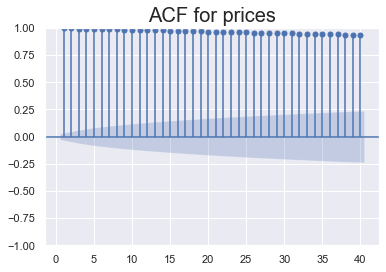

In [8]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for prices", size = 20)
plt.show()

De la gráfica de $ACF$, observamos que:
* Todos los $40$ coeficientes de autocorrelación ($\varphi _1, \ldots , \varphi _{40}$) son significativos y además disminuyen lentamente.
* Todos son positivos

Como sabemos que la $ACF$ captura los efectos directos e indirectos en ambos del valor anterior sobre el valor presente y nosotros queremos un modelo eficiente, es decir, solo queremos considerar aquellos retrasos que tenga un **efecto directo y significativo** sobre el período presente. Por lo tanto, debemos examinar la función de autocorrelación parcial $PACF$ .

<h2> PACF </h2>

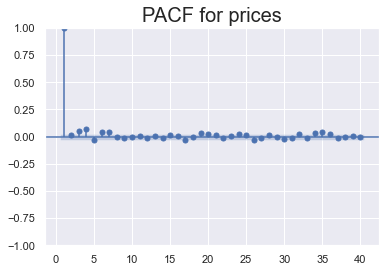

In [9]:
sgt.plot_pacf(df.market_value, zero = False, lags = 40, alpha =0.05, method = ("ols"))
plt.title("PACF for prices", size = 20)
plt.ylim(-1,1)
plt.show()

Con la gráfica de autocorrelación parcial podemos observar lo siguiente:

* Los coeficientes $\varphi $ son de diferentes tamaños.
* Hay coefientes $\varphi $ negativos y positivos. 
* Hay coeficientes $\varphi $ que son la mayoría que son NO significativos.
* Este gráfico es muy diferente con respecto al $ACF$.
* Después del retraso $22$ son negativos a primera vista esto parece algo extraño, pero conociendo los detalles de nuestros datos podemos encontrar una justificación razonable. Dado que la frecuencia de los datos son días hábiles y aproximadamente hay $22$ días háblies en un mes, podemos anticipar algunos cambios cíclicos cada mes.  

* El $\varphi _1$ tiene mucho más impacto, entonces estamos seguros de que el valor de nuestro primer retraso es muy significativo por lo que debemos incluir en nuestro modelo. Así que veremos que pasa con el modelo $AR(1)$


**AR(1)**

In [10]:
model_ar_1 = ARIMA(df.market_value, order=(1,0,0)) 
results_ar_1 = model_ar_1.fit() #Guardamos en results para ver como se ajustan
#los datos (fit() es para ajustarlo)
results_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Mon, 23 May 2022   AIC                          55251.207
Time:                        17:42:15   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6375    423.328     12.023      0.000    4259.930    5919.345
ar.L1          0.9984      0.001   1147.579      0.000       0.997       1.000
sigma2      3511.3843     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Prueba de hipótesis para la significación de los parámetros** 
* $H_0$: El coeficiente $\Phi _k$ es significativamente igual a $0$.
* $H_a$: El coeficiente $\Phi _k$ es significativamente distinto de $0$

Dado lo anterior, vemos que el $p-valor$ de $c$ y $\Phi _1$ es igual a $0.000$, con esto tenemos que, en los dos caso $p-valor<\alpha $, es decir, $p-valor<0.05$ así que  en ambos **rechazamos $H_0$**. 

Ojo: También se puede ver lo anterior si en el intervalo de confianza contiene al $0$, si $[a<0<b]$ entonces el coefiente es significativamente igual a $0$, sino entonces es significativamente distinto de $0$

Ejemplo: Para el coeficiente $c$, tenemos que el intervalo de confianza está dado por $[4269.93, 5919.345]$, el cual no contiene al $0$ por tal motivo el coeficiente de $c$ es significativamente distinto de $0$

Concluimos que los coeficientes $c$ y $\Phi _1$ son significativamentes distinto de $0$.

<h2> Ajustar un modelo autorregresivo </h2> 

En este caso usaremos la **Prueba de Razón de Verosimilitud** para ver si un modelo más complejo nos da mejores predicciones o no.


**AR(2)**

In [11]:
model_ar_2 = ARIMA(df.market_value, order=(2,0,0)) 
results_ar_2 = model_ar_2.fit() 
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Mon, 23 May 2022   AIC                          55251.898
Time:                        17:42:19   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Tenemos que los $p-valores$ tanto de $c$ y $\Phi $ son $0.000$, por lo tanto son **Significativos distintos de $0$**, sin embargo el coeficiente de $\Phi $ tiene un $p-valor=0.080>0.05$, por lo cual este coefiente es **significativamente igual a $0$**

Esto lo que quiere decir que el precio de hace $2$ días no afecta severamente a los precios de hoy, una posible explicación podría ser que todos los efectos están capturados en el precio de ayer, por lo tanto agregar información adicional no proporciona un valor significativo.

**AR(3)**

In [12]:
model_ar_3 = ARIMA(df.market_value, order=(3,0,0)) 
results_ar_3 = model_ar_3.fit() 
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Mon, 23 May 2022   AIC                          55241.925
Time:                        17:42:25   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**AR(4)**

In [13]:
model_ar_4 = ARIMA(df.market_value, order=(4,0,0)) 
results_ar_4 = model_ar_4.fit() 
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Mon, 23 May 2022   AIC                          55217.359
Time:                        17:42:32   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.414    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

De lo anterior podemos observar que: 
* Mientras más compejidad le vamos añadiendo al modelo, más aumenta el logaritmo de la verosimilitud **(Log Likelihood)**.
* Aunque tengamos coefientes negativos, si su intervalo de confianza contiene al $0$ podemos suponer que el coefiente es igual a $0$.
* Como regla general, vamos a preferir modelos con una mayor probabilidad del logaritmo de la verosimilitud.
* Observamos que los criterios de información $AIC$ y $BIC$, van disminuyendo. Como regla general también vamos a preferir valores más bajos de estos dos criterios.

Usando el contraste de **prueba de razón de log-verosimilitudes o log-likelihood test** para determinar si los dos modelos son significativamente diferentes, es decir, esto es como un contraste aparte que se hace entre $2$ modelos. Esto es para saber cual de los dos modelos es mejor:

<h2> Prueba de razón Log-LikeLihood  </h2>



* $H_0:$ Los dos modelos son significativamente **iguales.**
* $H_a:$ Los dos modelos son significativamente **diferentes.**

In [14]:
def LLR_test(mod_1,mod_2,DF=1): #DF son los grados de libertad
    L1=mod_1.llf # Me da Log Likelihood del mod_1 que de como entrada
    L2=mod_2.llf # Me da Log Likelihood del mod_2 que de como entrada
    LR=(2*(L2-L1)) # Estadístico de prueba
    p=chi2.sf(LR,DF).round(3) #P-valor
    return p

* $DF$: Son los grados de libertad, es decir, como en este caso estamos comparando el modelo $2$ con el $1$ entonces la diferencia de estos dos modelos es $1$, por eso DF=1
* $chi2.sf(LR,DF).round(3)$ : Se compara con la distribución (Xicuadrado) y obtenemos el p-valor dando como valores el estadístico de prueba, los grados de libertad y al final lo redondea a 3 decimales

Haciendo la **Prueba de Razón Log-LikeLihood** para los modelos $AR(2)$ y $AR(3)$ tenemos un p-valor de:

In [15]:
LLR_test(results_ar_2,results_ar_3)

0.001

Tenemos que $p-valor<\alpha $, es decir, $0.001<0.05$ con esto tenemos que **Rechazamos $H_0$**, por lo cual concluimos que **los modelos son significativamente diferentes**. Con esto, añadiendo complejidad el mejor modelo es el $AR(3)$

Haciendo la **Prueba de Razón Log-LikeLihood** para los modelos $AR(3)$ y $AR(4)$ tenemos un p-valor de:

In [16]:
LLR_test(results_ar_3,results_ar_4)

0.0

Tenemos que $p-valor<\alpha $, es decir, $0<0.05$ con esto tenemos que **Rechazamos $H_0$**, por lo cual concluimos que **los modelos son significativamente diferentes**. Con esto, añadiendo complejidad el mejor modelo es el $AR(4)$

<h2>Comparando Modelos AR (p) Higher-Lag  </h2>

* Si al comparar los modelos $AR(p)$ con $AR(p+l)$ obtenemos que los modelos son diferentes, escogeremos el de mayor complejidad, siempre y cuando el último coeficiente de $AR(p+l)$ sea significativamente distinto de $0$


In [17]:
model_ar_4 = ARIMA(df.market_value, order =(4,0,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print("LRR test: "+str(LLR_test(results_ar_3, results_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Mon, 23 May 2022   AIC                          55217.359
Time:                        17:42:40   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.414    5857.867
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

En este caso: $AR(3)$ y $AR(4)$
* El $p-valor$ del coeficiente $\Phi _4$ es $0.000$, lo cual tendemos que $p-valor<\alpha $, por lo cual **Rechazamos $H_0$** y concluimos que $\Phi _4$ es significativamente distinto de $0$, 
* Al realizar la **Prueba de Razón Log-Like-Lihood** respecto a $AR(3)$ y $AR(4)$ tenemos que  $p-valor<\alpha $, es decir $0<0.05$, con esto **Rechazamos $H_0$** y tenemos que los dos modelos son significativamente diferentes.

Dado los anteriores, nos quedamos con el modelo $AR(4)$, ya que tiene mayor complejidad y $\Phi _4$ es significativamente distinto de $0$.

In [18]:
model_ar_5 = ARIMA(df.market_value, order =(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("LRR test: "+str(LLR_test(results_ar_4, results_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Mon, 23 May 2022   AIC                          55214.920
Time:                        17:42:47   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.647    5846.635
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

En este caso: $AR(4)$ y $AR(5)$
* El $p-valor$ del coeficiente $\Phi _5$ es $0.001$, lo cual tendemos que $p-valor<\alpha $, por lo cual **Rechazamos $H_0$** y concluimos que $\Phi _5$ es significativamente distinto de $0$, 
* Al realizar la **Prueba de Razón Log-Like-Lihood** respecto a $AR(4)$ y $AR(5)$ tenemos que  $p-valor<\alpha $, es decir $0.035<0.05$, con esto **Rechazamos $H_0$** y tenemos que los dos modelos son significativamente diferentes.

Dado los anteriores, nos quedamos con el modelo $AR(5)$, ya que tiene mayor complejidad y $\Phi _5$ es significativamente distinto de $0$.

In [19]:
model_ar_6 = ARIMA(df.market_value, order =(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("LRR test: "+str(LLR_test(results_ar_5, results_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27596.587
Date:                Mon, 23 May 2022   AIC                          55209.174
Time:                        17:43:15   BIC                          55261.345
Sample:                    01-07-1994   HQIC                         55227.455
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    396.931     12.822      0.000    4311.670    5867.612
ar.L1          0.9800      0.010     96.873      0.000       0.960       1.000
ar.L2         -0.0333      0.014     -2.438      0.0

En este caso: $AR(5)$ y $AR(6)$
* El $p-valor$ del coeficiente $\Phi _6$ es $0.000$, lo cual tendemos que $p-valor<\alpha $, por lo cual **Rechazamos $H_0$** y concluimos que $\Phi _6$ es significativamente distinto de $0$, 
* Al realizar la **Prueba de Razón Log-Like-Lihood** respecto a $AR(5)$ y $AR(6)$ tenemos que  $p-valor<\alpha $, es decir $0.005<0.05$, con esto **Rechazamos $H_0$** y tenemos que los dos modelos son significativamente diferentes.

Dado los anteriores, nos quedamos con el modelo $AR(6)$, ya que tiene mayor complejidad y $\Phi _6$ es significativamente distinto de $0$.

In [20]:
model_ar_7 = ARIMA(df.market_value, order =(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("LRR test: "+str(LLR_test(results_ar_6, results_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Mon, 23 May 2022   AIC                          55202.044
Time:                        17:44:14   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.380     12.555      0.000    4295.110    5884.172
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.0

En este caso: $AR(6)$ y $AR(7)$
* El $p-valor$ del coeficiente $\Phi _7$ es $0.000$, lo cual tendemos que $p-valor<\alpha $, por lo cual **Rechazamos $H_0$** y concluimos que $\Phi _7$ es significativamente distinto de $0$, 
* Al realizar la **Prueba de Razón Log-Like-Lihood** respecto a $AR(6)$ y $AR(7)$ tenemos que  $p-valor<\alpha $, es decir $0.003<0.05$, con esto **Rechazamos $H_0$** y tenemos que los dos modelos son significativamente diferentes.

Dado los anteriores, nos quedamos con el modelo $AR(7)$, ya que tiene mayor complejidad y $\Phi _7$ es significativamente distinto de $0$.

In [21]:
model_ar_8 = ARIMA(df.market_value, order =(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("LRR test: "+str(LLR_test(results_ar_7, results_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Mon, 23 May 2022   AIC                          55203.708
Time:                        17:45:09   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.243     12.498      0.000    4291.460    5887.822
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.0

En este caso: $AR(7)$ y $AR(8)$
* El $p-valor$ del coeficiente $\Phi _8$ es $0.415$, lo cual tendemos que $p-valor>\alpha $, por lo cual **Aceptamos $H_0$** y concluimos que $\Phi _8$ es significativamente igual a $0$, 
* Al realizar la **Prueba de Razón Log-Like-Lihood** respecto a $AR(7)$ y $AR(8)$ tenemos que  $p-valor>\alpha $, es decir $0.562<0.05$, con esto **Aceptamos $H_0$** y tenemos que los dos modelos son significativamente iguales.

Dado los anteriores, nos quedamos con el modelo $AR(7)$, ya que su último coeficiente $\varphi _7$ es significativamente diferente de $0$ y como son iguales, escogemos el más simple.


Comparando el modelo $AR(1)$ respecto a $AR(3)$ tendremos lo siguiente:

OJO. DF=6, ya que estamos comparando el modelo $AR(7)$ con $AR(1)$, es decir, $7-1=6$ grados de libertad. 

In [22]:
print("LRR test: "+str(LLR_test(results_ar_1, results_ar_7, DF=6)))

LRR test: 0.0


En este caso: $AR(1)$ y $AR(7)$
* El $p-valor$ del coeficiente $\Phi _7$ es $0.0$, lo cual tendemos que $p-valor<\alpha $, por lo cual **Rechazamos $H_0$** y concluimos que $\Phi _7$ es significativamente diferente de $0$, 
* Al realizar la **Prueba de Razón Log-Like-Lihood** respecto de $AR(1)$ y $AR(7)$ tenemos que  $p-valor<\alpha $, es decir $0.0<0.05$, con esto **Rechazamos $H_0$** y tenemos que los dos modelos son significativamente diferntes.


Dado lo anterior, nos quedamos con el modelo $AR(7)$ ya que tiene mayor complejidad.


<h2> Análisis de los Residuos del modelo $AR(7)$ </h2>

In [23]:
df["Residuos_price"] = results_ar_7.resid # Extrae los residuos del modelo

C:\Users\81799\AppData\Local\Temp\ipykernel_16016\3206254562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Residuos_price"] = results_ar_7.resid # Extrae los residuos del modelo


In [24]:
sts.adfuller(df.Residuos_price)

(-76.05339409944524,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.15874022037)

Con un $p-valor<\alpha $, es decir, $0<0.05$ tenemos que **Rechazamos $H_0$**, por lo cual concluimos que **los residuos del modelo son Estacionarios**

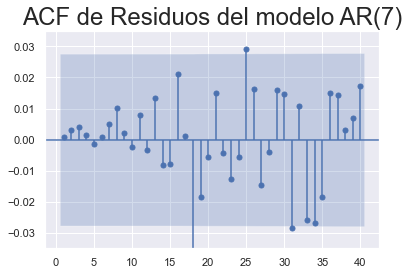

In [25]:
sgt.plot_acf(df.Residuos_price, zero = False , lags =40)
plt.title("ACF de Residuos del modelo AR(7)", size = 24)
plt.ylim(-.035,.035)
plt.show()

Observamos que la mayoria de los retraso $\varphi $ caen dentro de la zona azul, por lo cual son significativmente iguales a $0$, es decir, que no hay autocorrelación. Sin embargo hay puntos que salen del área azul, esto sugiere que aunque el modelo $AR(7)$ es un buen modelo para predecir, lo que nos sugiere es que puede haber un mejor predictor.

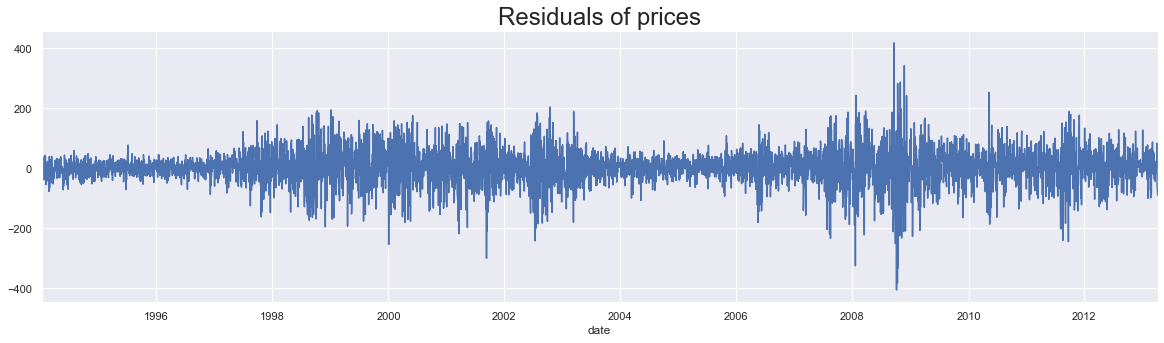

In [26]:
df.Residuos_price[1:].plot(figsize=(20,5))
plt.title("Residuals of prices", size =24)
plt.show()

Observamos que la gráfica de los residuos se parecen a los de un **ruido blanco**, es decir, que no hay ningún patrón.

<h2> Conclusión </h2>


Si se mira el modelo $AR(7)$ se observa que tenemos coeficientes que NO son significativos distintos de $0$, lo cual esto puede ser un problemas. 

**Los modelos autoregresivos AR(p) modelan mejor la serie de tiempo que son ESTACIONARIAS**, si hacemos ajustes de Dicket-Fuller obtenemos que No proviene de un proceso estacionario, tanto esto sugiere que no podemos confiar en un modelo autorregresivo para modelar esta serie de tiempo, sin embargo la solución será transoformar los datos para que cumpla la condición de estacionalidad.